# **Aprendizaje supervisado**
# SL08. k-Nearest Neighbor

## <font color='blue'>**k-Nearest Neighbor**</font>

K-Nearest-Neighbor es un algoritmo basado en instancia de tipo supervisado de Machine Learning. Puede usarse para clasificar nuevas muestras (valores discretos) o para predecir (regresión, valores continuos). Al ser un método sencillo, es ideal para introducirse en el mundo del  Aprendizaje Automático. Sirve esencialmente para clasificar valores buscando los puntos de datos “más similares” (por cercanía) aprendidos en la etapa de entrenamiento y haciendo conjeturas de nuevos puntos basado en esa clasificación.

## ¿Qué es el algoritmo k-Nearest Neighbor?

Es un método que simplemente busca en las observaciones más cercanas a la que se está tratando de predecir y clasifica el punto de interés basado en la mayoría de datos que le rodean. Como dijimos antes, es un algoritmo:

**Supervisado**: esto -brevemente- quiere decir que tenemos etiquetado nuestro conjunto de datos de entrenamiento, con la clase o resultado esperado dada “una fila” de datos.

**Basado en Instancia**: Esto quiere decir que nuestro algoritmo no aprende explícitamente un modelo (como por ejemplo en Regresión Logística o árboles de decisión). En cambio memoriza las instancias de entrenamiento que son usadas como “base de conocimiento” para la fase de predicción.


## ¿Dónde se aplica k-Nearest Neighbor?

Aunque sencillo, se utiliza en la resolución de multitud de problemas, como en sistemas de recomendación, búsqueda semántica y detección de anomalías.
## Pros y contras

Como pros tiene sobre todo que es sencillo de aprender e implementar. Tiene como contras que utiliza todo el dataset para entrenar “cada punto” y por eso requiere de uso de mucha memoria y recursos de procesamiento (CPU). Por estas razones kNN tiende a funcionar mejor en datasets pequeños y sin una cantidad enorme de features (las columnas).

## ¿Cómo funciona kNN?

1. Calcular la distancia entre el item a clasificar y el resto de items del dataset de entrenamiento.
2. Seleccionar los “k” elementos más cercanos (con menor distancia, según la función que se use)
3. Realizar una “votación de mayoría” entre los k puntos: los de una clase/etiqueta que <<dominen>> decidirán su clasificación final.

Teniendo en cuenta el punto 3, veremos que para decidir la clase de un punto es muy importante el valor de k, pues este terminará casi por definir a qué grupo pertenecerán los puntos, sobre todo en las “fronteras” entre grupos. Por ejemplo -y a priori- yo elegiría valores impares de k para desempatar (si las features que utilizamos son pares). No será lo mismo tomar para decidir 3 valores que 13. Esto no quiere decir que necesariamente tomar más puntos implique mejorar la precisión. Lo que es seguro es que cuantos más “puntos k”, más tardará nuestro algoritmo en procesar y darnos respuesta.

Las formas más populares de “medir la cercanía” entre puntos son la distancia Euclidiana (la “de siempre”) o la Cosine Similarity (mide el ángulo de  los vectores, cuanto menores, serán similares). Recordemos que este algoritmo -y prácticamente todos en ML- funcionan mejor con varias características de las que tomemos datos (las columnas de nuestro dataset). Lo que entendemos como “distancia” en la vida real, quedará abstracto a muchas dimensiones que no podemos “visualizar” fácilmente (como por ejemplo en un mapa).

![Imagen](https://drive.google.com/uc?id=1cKo1M5xC5fYwwiOJbF4D2cR8ThUBtyoq)

## Un ejemplo 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Leemos nuestro archivo de entrada

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving reviews_sentiment.csv to reviews_sentiment.csv


In [ ]:
dataframe = pd.read_csv(r"reviews_sentiment.csv",sep=';')
dataframe.head(10)

,Review Title,Review Text,wordcount,titleSentiment,textSentiment,Star Rating,sentimentValue
0,Sin conexión,Hola desde hace algo más de un mes me pone sin...,23,negative,negative,1,-0.486389
1,faltan cosas,Han mejorado la apariencia pero no,20,negative,negative,1,-0.586187
2,Es muy buena lo recomiendo,Andres e puto amoooo,4,NaN,negative,1,-0.602240
3,Version antigua,Me gustana mas la version anterior esta es mas...,17,NaN,negative,1,-0.616271
4,Esta bien,Sin ser la biblia.... Esta bien,6,negative,negative,1,-0.651784
5,Buena,Nada del otro mundo pero han mejorado mucho,8,positive,negative,1,-0.720443
6,De gran ayuda,"Lo malo q necesita de …,pero la app es muy buena",23,positive,negative,1,-0.726825
7,Muy buena,"Estaba más acostumbrado al otro diseño, pero e...",16,positive,negative,1,-0.736769
8,Ta to guapa.,Va de escándalo,21,positive,negative,1,-0.765284
9,Se han corregido,Han corregido muchos fallos pero el diseño es ...,13,negative,negative,1,-0.797961


In [ ]:
dataframe.describe()

,wordcount,Star Rating,sentimentValue
count,257.000000,257.000000,257.000000
mean,11.501946,3.420233,0.383849
std,13.159812,1.409531,0.897987
min,1.000000,1.000000,-2.276469
25%,3.000000,3.000000,-0.108144
50%,7.000000,3.000000,0.264091
75%,16.000000,5.000000,0.808384
max,103.000000,5.000000,3.264579


## Rápidas visualizaciones

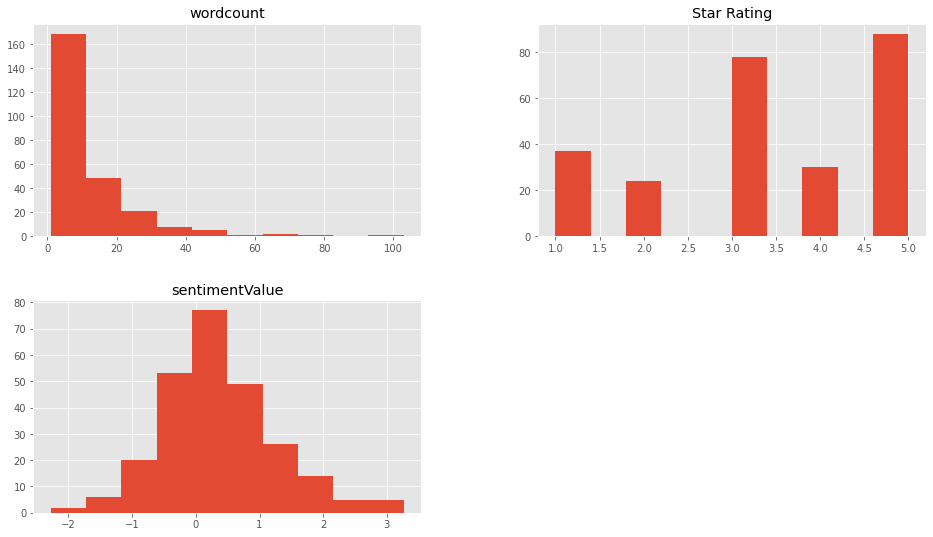

In [ ]:
dataframe.hist()
plt.show()

In [ ]:
print(dataframe.groupby('Star Rating').size())

Star Rating
1    37
2    24
3    78
4    30
5    88
dtype: int64


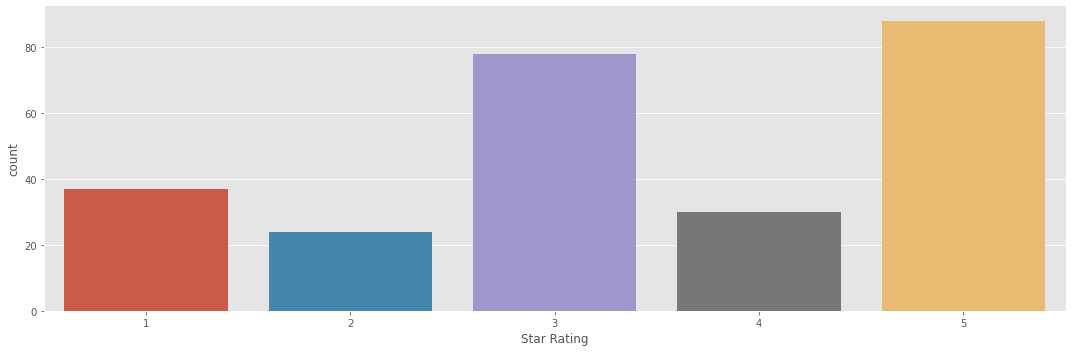

In [ ]:
#sb.factorplot('Star Rating',data=dataframe,kind="count", aspect=3)
sb.catplot(x='Star Rating', data=dataframe, kind="count", aspect=3)

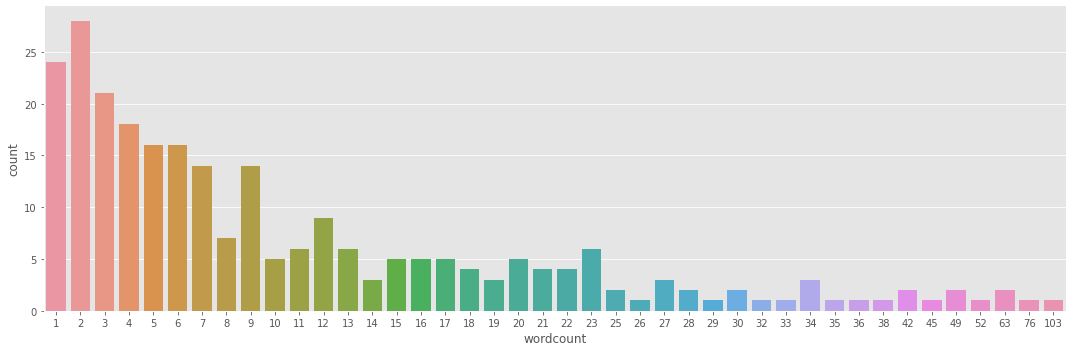

In [ ]:
#sb.factorplot('wordcount',data=dataframe,kind="count", aspect=3)
sb.catplot(x='wordcount',data=dataframe,kind="count", aspect=3)

## Preparamos el dataset

In [ ]:
X = dataframe[['wordcount','sentimentValue']].values
y = dataframe['Star Rating'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Normalizar escalando datos, quedando desviaciones estandar 1 y media cero.
scaler = MinMaxScaler()

# Normalizar datos de entrada
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# el escalado ayuda a estandarizar los datos y logrando que el peso relativo de las variables no este influenciado por el valor de estos.
 

In [ ]:
X.shape, X_train.shape, X_test.shape, y.shape, y_train.shape, y_test.shape

((257, 2), (192, 2), (65, 2), (257,), (192,), (65,))

## Creamos el Modelo

In [ ]:
# cuantos vecinos se consiran al rededor del punto.
n_neighbors = 7

knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.90
Accuracy of K-NN classifier on test set: 0.86


## Resultados obtenidos

In [ ]:
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[ 9  0  1  0  0]
 [ 0  1  0  0  0]
 [ 0  1 17  0  1]
 [ 0  0  2  8  0]
 [ 0  0  4  0 21]]
              precision    recall  f1-score   support

           1       1.00      0.90      0.95        10
           2       0.50      1.00      0.67         1
           3       0.71      0.89      0.79        19
           4       1.00      0.80      0.89        10
           5       0.95      0.84      0.89        25

    accuracy                           0.86        65
   macro avg       0.83      0.89      0.84        65
weighted avg       0.89      0.86      0.87        65



# Gráfica de la Clasificación Obtenida

In [ ]:
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#ffcc99', '#ffffb3','#b3ffff','#c2f0c2'])
cmap_bold = ListedColormap(['#FF0000', '#ff9933','#FFFF00','#00ffff','#00FF00'])

# we create an instance of Neighbours Classifier and fit the data.
clf = KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


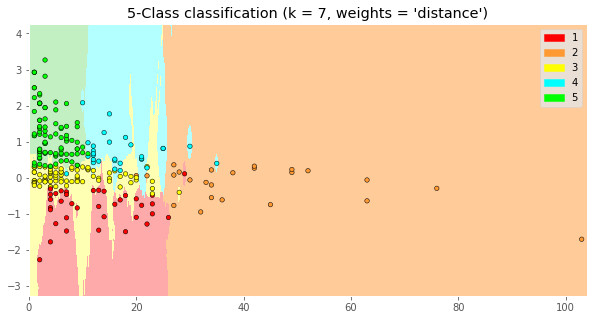

In [ ]:

# Put the result into a color plot
plt.figure(figsize=(10,5))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
    
patch0 = mpatches.Patch(color='#FF0000', label='1')
patch1 = mpatches.Patch(color='#ff9933', label='2')
patch2 = mpatches.Patch(color='#FFFF00', label='3')
patch3 = mpatches.Patch(color='#00ffff', label='4')
patch4 = mpatches.Patch(color='#00FF00', label='5')
plt.legend(handles=[patch0, patch1, patch2, patch3,patch4])

    
plt.title("5-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, 'distance'))

plt.show()

## Cómo obtener el mejor valor de k

([<matplotlib.axis.XTick at 0x7fefd565a650>,
 <a list of 11 Text major ticklabel objects>)

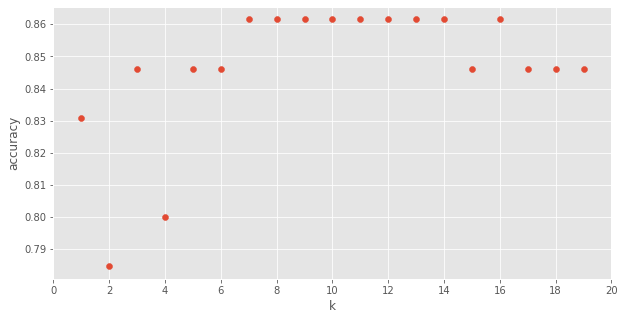

In [ ]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
    
plt.figure(figsize=(10,5))
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,2,4,6,8,10,12,14,16,18,20])

# Predicciones

In [ ]:
print(clf.predict([[5, 1.0]]))


[5]


In [ ]:
print(clf.predict_proba([[20, 0.0]]))

[[0.00381998 0.02520212 0.97097789 0.         0.        ]]


## <font color='green'>Actividad 1</font>

Construiremos un modelo kNN utilizando el data set *breast cancer*. A continuación de entregan los pasos principales para construir su modelo.

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer_data = load_breast_cancer()

In [ ]:
cancer_data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
cancer_df = pd.DataFrame(np.c_[cancer_data['data'], cancer_data['target']],
                  columns= np.append(cancer_data['feature_names'], ['target']))


In [ ]:
cancer_df[['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension']].head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [ ]:
cancer_df[['radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error']].head(5)

,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error
0,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193
1,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532
2,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571
3,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208
4,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115


In [ ]:
cancer_df[['worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension']].head(5)

,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
cancer_df[['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension']].describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440



Se puede separar los datos en tres grupos de los valores medios, de error y peores. 

Solo se considerara los valores medios por ser mas representativos, ya que los valores de error, suponenen una desviación de los valores medios y los valores peores son mediciones extremas.  

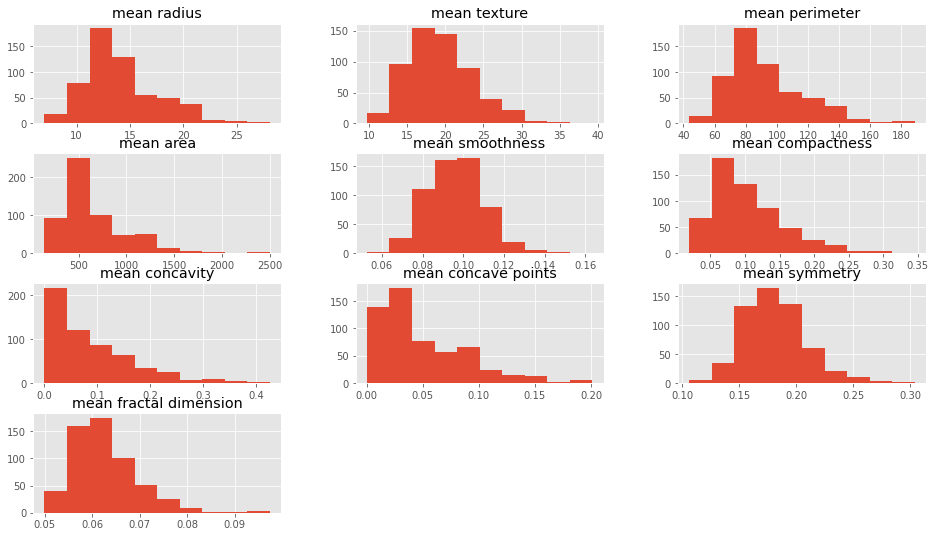

In [ ]:
import seaborn as sns

cancer_df[['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension']].hist()
plt.show()


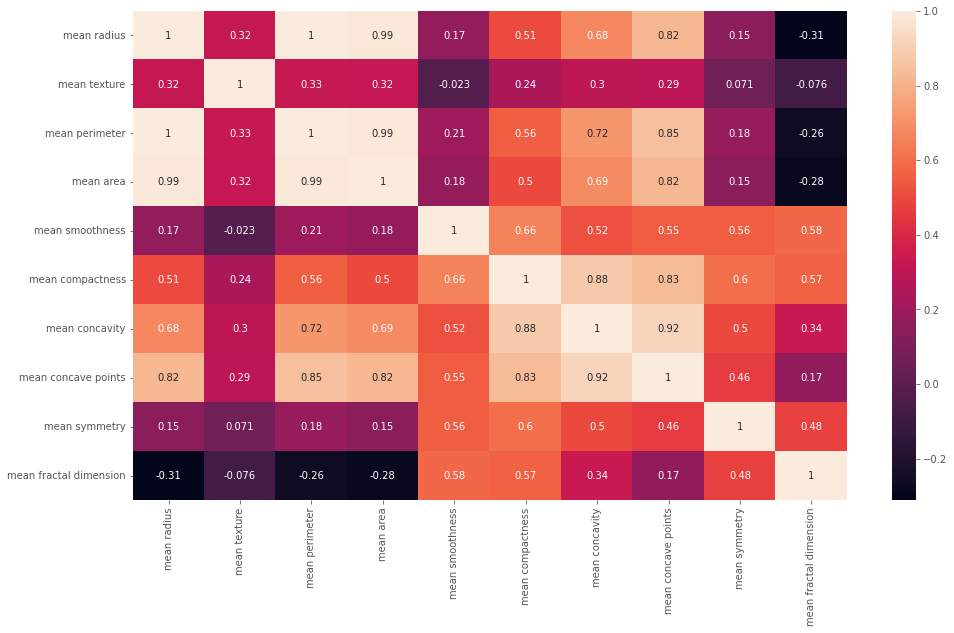

In [ ]:
sns.heatmap(cancer_df[['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension']].corr(),annot=True)  

plt.show()


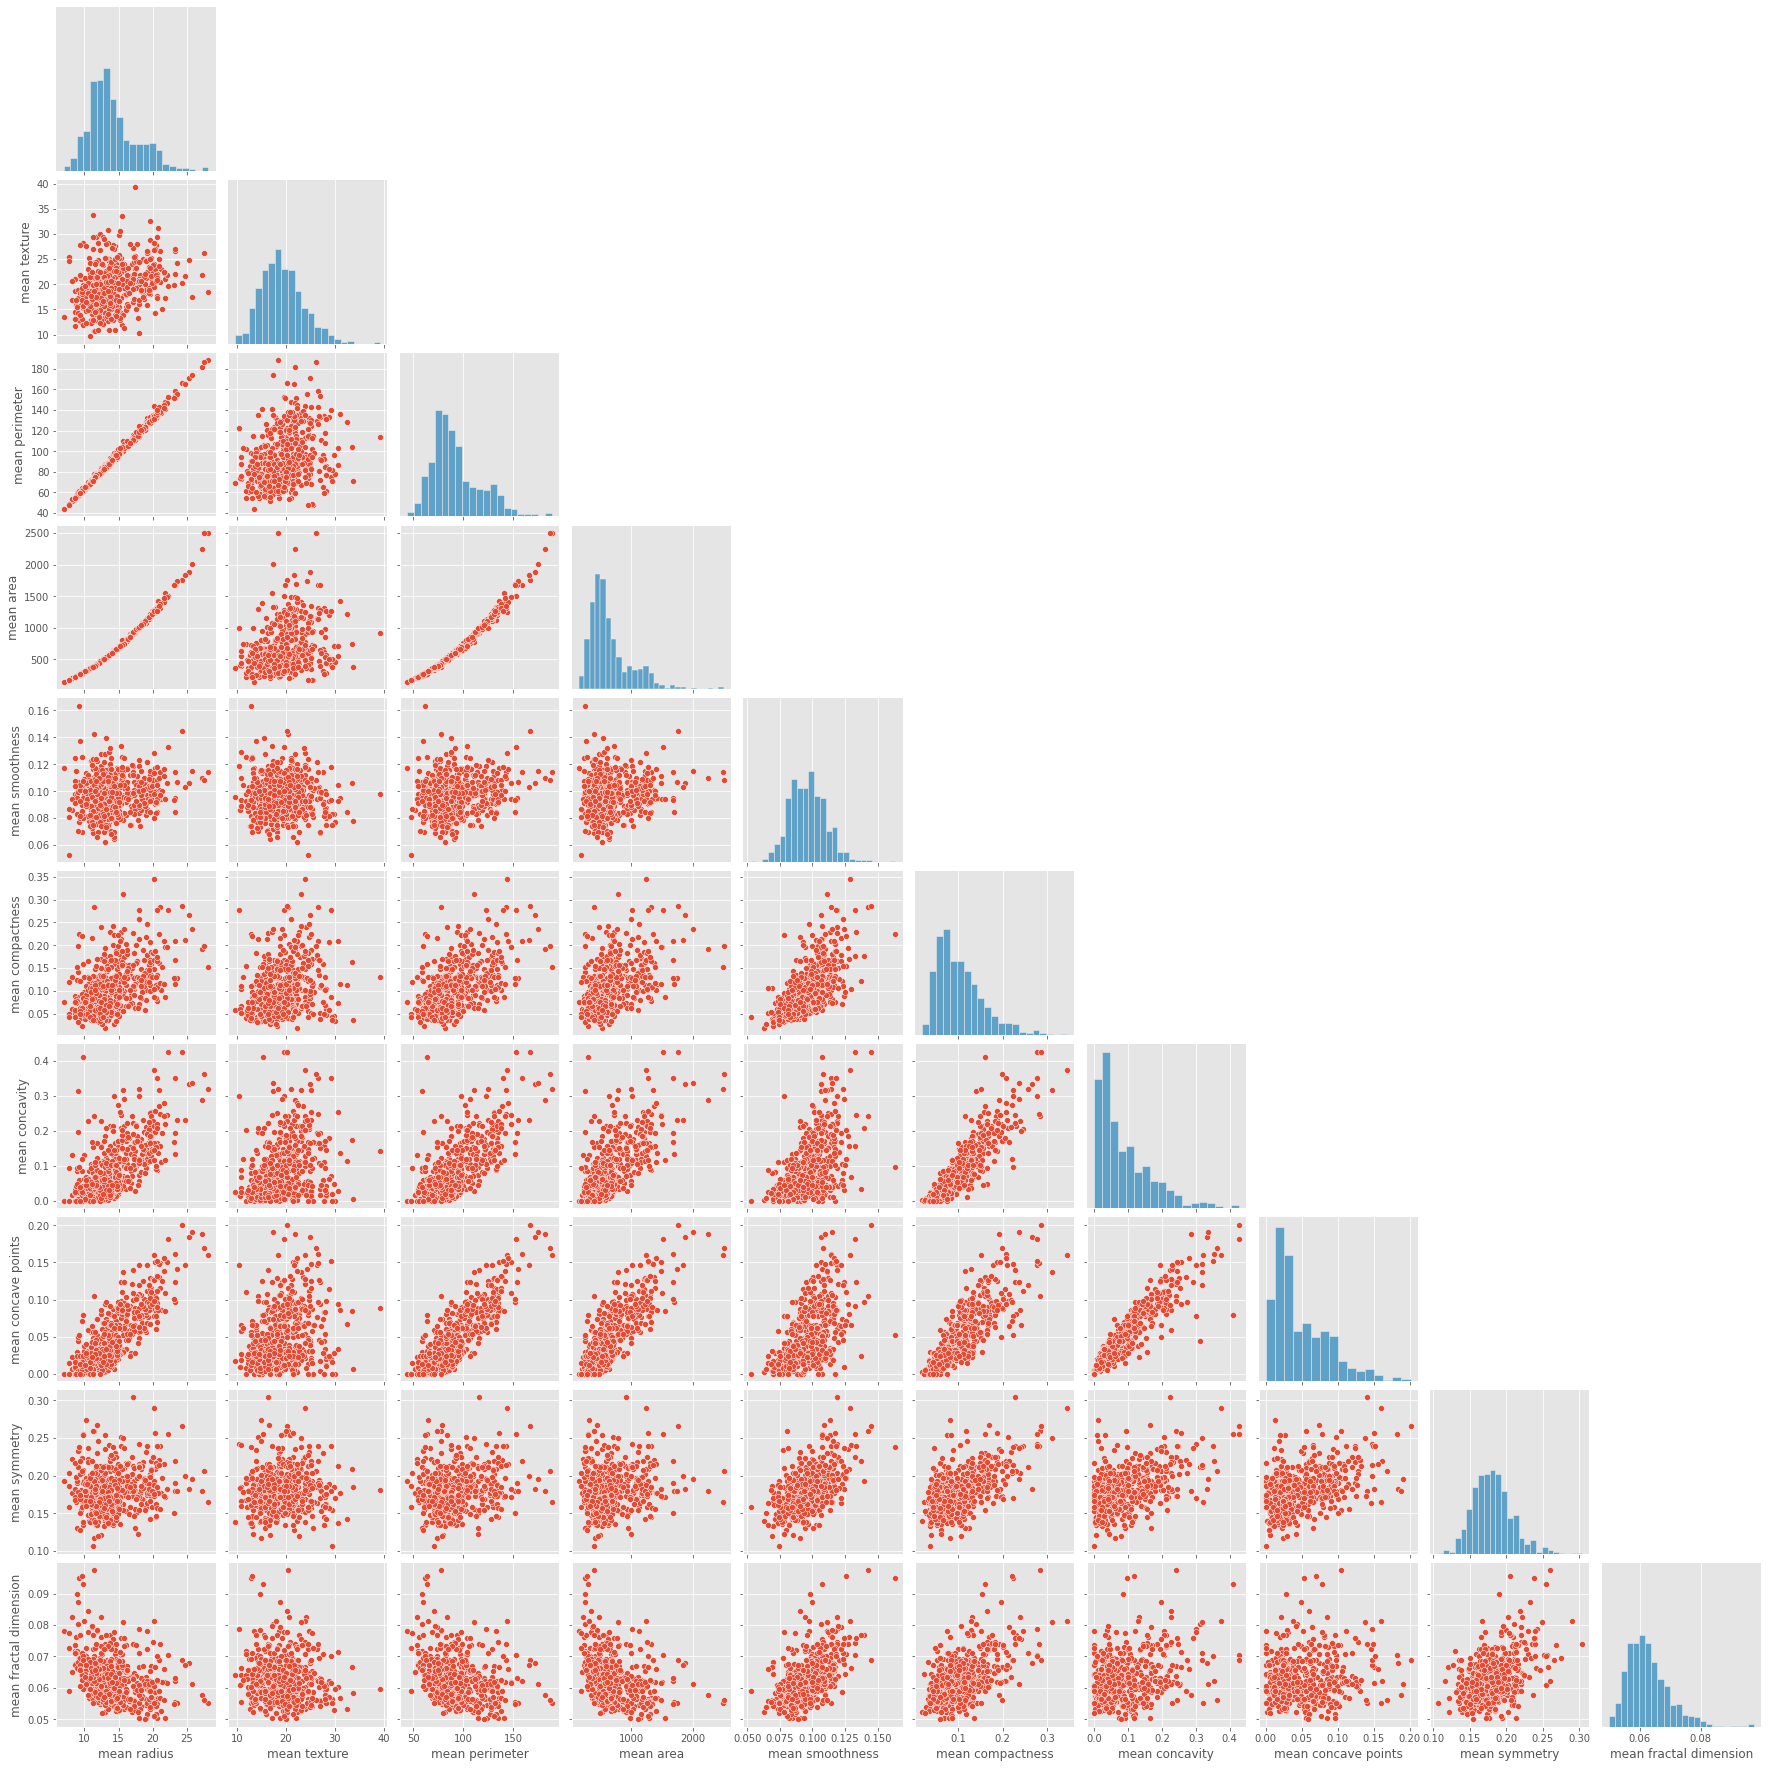

In [ ]:
sns.pairplot(data=cancer_df[['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension']], corner=True)  

plt.show()

In [ ]:
# Valores a considear

# se puede aplicar el algoritmo sonbre varias columnas, pero no se puede graficar.
#cancer_X=cancer_df[['mean radius', 'mean texture', 'mean perimeter', 'mean area',
#       'mean smoothness', 'mean compactness', 'mean concavity',
#       'mean concave points', 'mean symmetry', 'mean fractal dimension']].values

# valores x 
cancer_X=cancer_df[['mean radius', 'mean texture']].values

# Target con valor 0 indica que no tiene cancer y 1 que si tiene cancer
cancer_y=cancer_df['target'].values

Separe en entrenamiento y test.

In [ ]:
#Separar entre muestras de entrenamiento y test
cancer_X_train, cancer_X_test, cancer_y_train, cancer_y_test = train_test_split(cancer_X, cancer_y, test_size=0.30, random_state=0)

# Normalizar escalando datos, quedando desviaciones estandar 1 y media cero.
scaler = MinMaxScaler()

# Normalizar datos de entrada
cancer_X_train = scaler.fit_transform(cancer_X_train)
cancer_X_test = scaler.transform(cancer_X_test)


In [ ]:
cancer_X.shape, cancer_X_train.shape, cancer_X_test.shape, cancer_y.shape, cancer_y_train.shape, cancer_y_test.shape 

((569, 2), (398, 2), (171, 2), (569,), (398,), (171,))

In [ ]:
# cuantos vecinos se consiran al rededor del punto.
cancer_n_neighbors = 5

cancer_knn = KNeighborsClassifier(cancer_n_neighbors)
cancer_knn.fit(cancer_X_train, cancer_y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}' .format(cancer_knn.score(cancer_X_train, cancer_y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}' .format(cancer_knn.score(cancer_X_test, cancer_y_test)))

Accuracy of K-NN classifier on training set: 0.92
Accuracy of K-NN classifier on test set: 0.88


Genere un reporte de clasificacion (classification_report)

In [ ]:
cancer_pred = cancer_knn.predict(cancer_X_test)
print(confusion_matrix(cancer_y_test, cancer_pred))
print(classification_report(cancer_y_test, cancer_pred))

[[51 12]
 [ 9 99]]
              precision    recall  f1-score   support

         0.0       0.85      0.81      0.83        63
         1.0       0.89      0.92      0.90       108

    accuracy                           0.88       171
   macro avg       0.87      0.86      0.87       171
weighted avg       0.88      0.88      0.88       171



Encuentre el mejor valor de k que maximice accuracy.

([<matplotlib.axis.XTick at 0x7f385d484690>,
 <a list of 16 Text major ticklabel objects>)

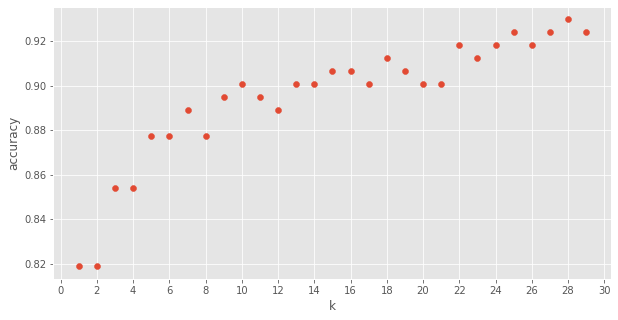

In [ ]:
cancer_k_range = range(1, 30)
cancer_scores = []
for k in cancer_k_range:
    cancer_knn = KNeighborsClassifier(n_neighbors = k)
    cancer_knn.fit(cancer_X_train, cancer_y_train)
    cancer_scores.append(cancer_knn.score(cancer_X_test, cancer_y_test))

plt.figure(figsize=(10,5))
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(cancer_k_range, cancer_scores)
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30])

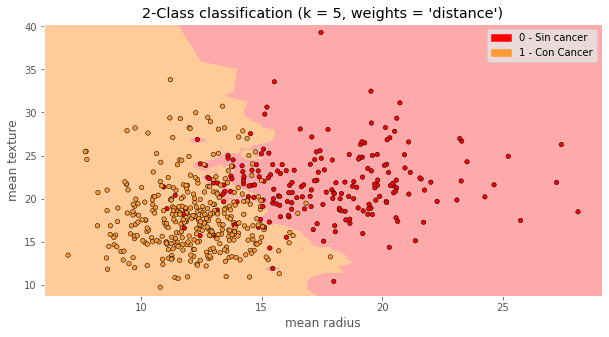

In [ ]:
#Graficar
# Solo se puede graficar dos de las variables.

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#ffcc99'])
cmap_bold = ListedColormap(['#FF0000', '#ff9933'])

# we create an instance of Neighbours Classifier and fit the data.
cancer_clf = KNeighborsClassifier(n_neighbors=cancer_n_neighbors, weights='distance')
cancer_clf.fit(cancer_X, cancer_y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
cancer_x_min, cancer_x_max = cancer_X[:, 0].min() - 1, cancer_X[:, 0].max() + 1
cancer_y_min, cancer_y_max = cancer_X[:, 1].min() - 1, cancer_X[:, 1].max() + 1

cancer_xx, cancer_yy = np.meshgrid(np.arange(cancer_x_min, cancer_x_max, h),
                                   np.arange(cancer_y_min, cancer_y_max, h))

cancer_Z = cancer_clf.predict((np.c_[cancer_xx.ravel(), cancer_yy.ravel()]))
cancer_Z = cancer_Z.reshape(cancer_xx.shape)

# Put the result into a color plot
plt.figure(figsize=(10,5))
plt.pcolormesh(cancer_xx, cancer_yy, cancer_Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(cancer_X[:, 0], cancer_X[:, 1], c=cancer_y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(cancer_xx.min(), cancer_xx.max())
plt.ylim(cancer_yy.min(), cancer_yy.max())
    
patch0 = mpatches.Patch(color='#FF0000', label='0 - Sin cancer')
patch1 = mpatches.Patch(color='#ff9933', label='1 - Con Cancer')
plt.legend(handles=[patch0, patch1])

plt.title("2-Class classification (k = %i, weights = '%s')"
              % (cancer_n_neighbors, 'distance'))
plt.xlabel("mean radius")
plt.ylabel("mean texture")

plt.show()

In [ ]:
#Prediccion
print(cancer_clf.predict([[10, 10]])) # Si tendra cancer 
print(cancer_clf.predict([[20, 20]])) # No tendra cancer


[1.]
[0.]


Realice un 5 fold crossvalidation de 20 experimentos. Reporte el promedio y desviacion estandar de accuracy.

In [ ]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_validate

cancer_n_neighbors = 5
cancer_folds = 5
cancer_experimentos = 20
rkf_acuracy = []

rfk = RepeatedKFold(n_splits=cancer_folds, 
                    n_repeats=cancer_experimentos, 
                    random_state=None)

for train_index, test_index in rfk.split(cancer_X):
  rfk_X_train, rfk_X_test = cancer_X[train_index], cancer_X[test_index]
  rfk_y_train, rfk_y_test = cancer_y[train_index], cancer_y[test_index]

  cancer_knn = KNeighborsClassifier(cancer_n_neighbors)
  cancer_knn.fit(rfk_X_train, rfk_y_train)
  rkf_acuracy.append([cancer_knn.score(rfk_X_train, rfk_y_train), cancer_knn.score(rfk_X_test, rfk_y_test)])


In [ ]:
rkf_acuracy = np.array(rkf_acuracy)

print(f'Accuracy of K-NN classifier')
print(f'*******************************')
print(f'Train  Media: {rkf_acuracy[:,0].mean():5.3f}  std: {rkf_acuracy[:,0].std():5.3f}')
print(f'test   Media: {rkf_acuracy[:,1].mean():5.3f}  std: {rkf_acuracy[:,1].std():5.3f}')
print(f'*******************************')


Accuracy of K-NN classifier
*******************************
Train  Media: 0.910  std: 0.007
test   Media: 0.878  std: 0.026
*******************************


In [ ]:

print(f'Accuracy of K-NN classifier  ')
print(f'*****************************')
print(f'Exp. training      test      ')
print(f'*****************************')
for i in range(rkf_acuracy.shape[0]):
  print(f'{i:-3} {rkf_acuracy[i,0]:9.3f} {rkf_acuracy[i,0]:9.3f}')  
print(f'*****************************')


Accuracy of K-NN classifier  
*****************************
Exp. training      test      
*****************************
  0     0.912     0.912
  1     0.914     0.914
  2     0.914     0.914
  3     0.910     0.910
  4     0.904     0.904
  5     0.910     0.910
  6     0.923     0.923
  7     0.910     0.910
  8     0.899     0.899
  9     0.910     0.910
 10     0.903     0.903
 11     0.908     0.908
 12     0.910     0.910
 13     0.921     0.921
 14     0.908     0.908
 15     0.921     0.921
 16     0.914     0.914
 17     0.905     0.905
 18     0.903     0.903
 19     0.908     0.908
 20     0.921     0.921
 21     0.916     0.916
 22     0.914     0.914
 23     0.897     0.897
 24     0.901     0.901
 25     0.899     0.899
 26     0.905     0.905
 27     0.925     0.925
 28     0.927     0.927
 29     0.901     0.901
 30     0.905     0.905
 31     0.916     0.916
 32     0.903     0.903
 33     0.901     0.901
 34     0.921     0.921
 35     0.910     0.910
 36     0.912   

<font color='green'>Fin Actividad 1</font>